### **Redes Neurais Recorrentes (RNNs)**

As Redes Neurais Recorrentes (RNNs) são um tipo de rede neural projetada para processar sequências de dados, como séries temporais ou textos. A principal característica das RNNs é a capacidade de manter um estado interno que captura informações sobre as entradas anteriores, permitindo que a rede tenha "memória" dos passos anteriores na sequência.

A cada passo de tempo $t$, a RNN atualiza seu estado oculto $h_t$ com base na entrada atual $x_t$ e no estado oculto anterior $h_{t-1}$:

$$
h_t = \tanh(W_{ih} \cdot x_t + W_{hh} \cdot h_{t-1} + b_h)
$$

Aqui:
- $W_{ih}$ é a matriz de pesos que conecta a entrada ao estado oculto.
- $W_{hh}$ é a matriz de pesos que conecta o estado oculto anterior ao atual.
- $b_h$ é o termo de bias.
- $\tanh$ é a função de ativação que introduz não-linearidade.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import time

### **Implementação de uma Célula RNN**

Nesta seção, implementaremos uma célula RNN personalizada usando o PyTorch. A célula RNN é a unidade básica de uma RNN, responsável por calcular o novo estado oculto com base na entrada atual e no estado oculto anterior.

#### **Explicação do Código**

O código a seguir define uma célula RNN personalizada:

- **Entrada:** O tamanho da entrada `input_size` e o tamanho do estado oculto `hidden_size`.
- **Pesos:** $ W_{ih} $ e $ W_{hh} $ são as matrizes de pesos, e $ b_h $ é o bias.
- **Saída:** A célula computa o novo estado oculto $ h_t $ a partir da entrada e do estado oculto anterior.

In [2]:
class RNNCell(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        self.W_ih = nn.Linear(input_size, hidden_size, bias=False) # Define a matriz de pesos de entrada
        self.W_hh = nn.Linear(hidden_size, hidden_size, bias=False) # Define a matriz de pesos de saída
        self.b_h = nn.Parameter(torch.zeros(hidden_size)) # Define o bias

    def forward(self, x, h):
        # x: (batch_size, input_size)
        # h: (batch_size, hidden_size)
        ht = torch.tanh(self.W_ih(x) + self.W_hh(h) + self.b_h)
        return ht

### **Exemplo de Uso da Célula RNN**

Inicialmente, definimos uma célula RNN com um tamanho de entrada de 10 e um tamanho de estado oculto de 4.

In [3]:
# Exemplo
input_size = 10
hidden_size = 4

rnn_cell = RNNCell(input_size, hidden_size)

### **Inspeção dos Parâmetros da Célula RNN**

Neste trecho de código, vamos inspecionar os parâmetros da célula RNN que acabamos de definir. Em uma rede neural, os parâmetros são os valores ajustáveis (como os pesos e bias) que a rede aprende durante o treinamento.

Ao executar o código, veremos os nomes e as formas dos parâmetros:

- **`W_ih`**: Matriz de pesos conectando a entrada ao estado oculto.
- **`W_hh`**: Matriz de pesos conectando o estado oculto anterior ao atual.
- **`b_h`**: Termo de bias para o estado oculto.

In [4]:
for name, param in rnn_cell.named_parameters():
    print(name, param.shape)

b_h torch.Size([4])
W_ih.weight torch.Size([4, 10])
W_hh.weight torch.Size([4, 4])


#### **Explicação do Código**

No exemplo abaixo:
- Inicializamos uma entrada $x$ aleatória e um estado oculto inicial $h$ como zero.
- A célula RNN processa a entrada e gera um novo estado oculto.

In [5]:
x = torch.randn(input_size)
h = torch.zeros(hidden_size)

hn = rnn_cell(x, h)

hn.shape

torch.Size([4])

### **Processamento de Sequências com RNN**

RNNs são projetadas para processar sequências de dados, onde cada passo de tempo depende dos passos anteriores. Vamos demonstrar isso processando uma sequência de entradas com a célula RNN.

#### **Explicação do Código**

Neste exemplo:
- Processamos uma sequência de 3 entradas $x$ e atualizamos o estado oculto $h$ a cada passo.
- O estado oculto é propagado ao longo da sequência, capturando informações temporais.

In [6]:
# Sequences
seq_len = 3

x = torch.randn(seq_len, input_size)
h = torch.zeros(hidden_size)

# Para cada instante de tempo
for i in range(seq_len):
    # Atualiza o estado oculto
    h = rnn_cell(x[i], h)
    print(f"Passo {i+1}")
    print(f"h = {h}")
    print()

Passo 1
h = tensor([-0.1954,  0.7506, -0.1346,  0.1995], grad_fn=<TanhBackward0>)

Passo 2
h = tensor([ 0.7210,  0.6679, -0.3173,  0.8660], grad_fn=<TanhBackward0>)

Passo 3
h = tensor([ 0.7131, -0.4277, -0.1740,  0.7623], grad_fn=<TanhBackward0>)



### **Processamento de Sequências em Lote (Batched RNN)**

Para aumentar a eficiência, as RNNs podem processar várias sequências simultaneamente, usando o conceito de "batching". Cada sequência no lote é processada de forma independente, mas compartilhando os mesmos pesos da RNN.

#### **Explicação do Código**

Neste exemplo:
- Criamos um batch de 8 sequências, cada uma com 10 entradas.
- A célula RNN é aplicada ao batch, atualizando o estado oculto para cada sequência de forma paralela.

In [7]:
# Batched RNN
batch_size = 8

x = torch.randn(batch_size, input_size)
h = torch.zeros(batch_size, hidden_size)

hn = rnn_cell(x, h)

hn.shape

torch.Size([8, 4])

### **Processamento de Sequências em Lote com Múltiplos Passos de Tempo**

Aqui, processamos um batch de sequências ao longo de vários passos de tempo.

#### **Explicação do Código**

Neste exemplo:
- Processamos um lote de 8 sequências, cada uma com 3 passos de tempo.
- Em cada passo de tempo, a célula RNN atualiza o estado oculto para todas as sequências do lote.

In [8]:
# Sequences
seq_len = 3

x = torch.randn(batch_size, seq_len, input_size)
h = torch.zeros(batch_size, hidden_size)

# Para cada instante de tempo
for i in range(seq_len):
    # Atualiza o estado oculto
    h = rnn_cell(x[:, i], h)
    print(f"Passo {i}")
    print(f"h = {h.shape}")
    print()

Passo 0
h = torch.Size([8, 4])

Passo 1
h = torch.Size([8, 4])

Passo 2
h = torch.Size([8, 4])



### **Construção de uma Rede RNN Completa**

Vamos expandir a célula RNN que criamos anteriormente para uma rede RNN completa. A rede RNN será composta por uma célula RNN seguida por uma camada linear que produzirá a saída final.

#### **Explicação do Código**

- **`self.cell`**: Instância da célula RNN que processará cada passo da sequência.
- **`self.W_ho`**: Camada linear que mapeia o estado oculto final para a saída desejada.

No método `forward`:
- **Entrada (`x`)**: Um tensor de forma `(batch_size, seq_len, input_size)`, onde `seq_len` é o comprimento da sequência.
- **Estado oculto (`h`)**: Se não for fornecido, é inicializado como um vetor de zeros.
- **Processamento da sequência**: A entrada é processada passo a passo pela célula RNN.
- **Saída (`y`)**: Calculada pela camada linear a partir do estado oculto final.

In [9]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.output_size = output_size

        self.cell = RNNCell(input_size, hidden_size) # Define a célula RNN
        self.W_ho = nn.Linear(hidden_size, output_size) # Define a matriz de pesos de saída

    def forward(self, x, h=None):
        # x: (batch_size, seq_len, input_size)
        batch_size, seq_len, _ = x.size()

        # h: (batch_size, hidden_size)
        if h is None:
            h = torch.zeros(self.num_layers, batch_size, self.hidden_size)
        h = h.to(x.device)

        # Processa a sequência
        for i in range(seq_len):
          # Para cada layer
          #for j in range(self.num_layers):
            # Atualiza o estado oculto
            #h[j] = self.cell(x[:, i], h[j])
            h = self.cell(x[:, i], h)

        # Calcula a saída
        y = self.W_ho(h)
        return y

### **Geração de Dados para Treinamento**

Para treinar a RNN, precisamos de um conjunto de dados sequenciais. Neste exemplo, geramos uma série temporal baseada em uma função senoide com ruído adicionado.

#### **Explicação do Código**

- **`x`**: Sequência de pontos no intervalo $[0, 6\pi]$.
- **`y`**: Valores da função senoide com ruído gaussiano adicionado.

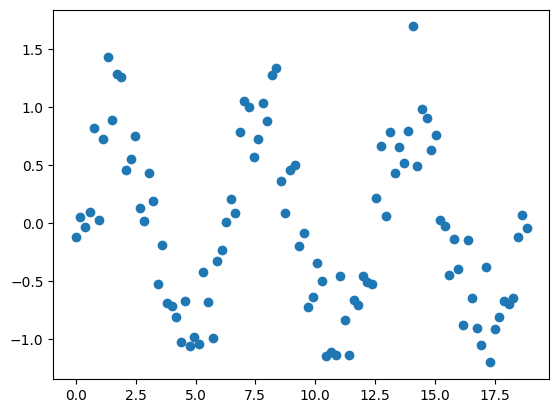

In [10]:
num_points = 100

x = np.linspace(0, 6*np.pi, num_points)
y = np.sin(x) + np.random.normal(0, 0.3, num_points)

plt.scatter(x, y)
plt.show()

### **Preparação das Sequências de Treinamento**

Agora, preparamos as entradas e as saídas alvo para o treinamento da RNN. Cada sequência de entrada será usada para prever o próximo ponto na série temporal.

#### **Explicação do Código**

- **`sequence_length`**: O comprimento da janela da sequência usada como entrada.
- **`inputs`**: Sequências de tamanho `sequence_length` extraídas dos dados.
- **`targets`**: O ponto subsequente na sequência que a rede deve prever.
- **Tensorização**: As sequências são convertidas em tensores PyTorch para uso na rede neural.

In [11]:
sequence_length = 20
batch_size = num_points - sequence_length
inputs = []
targets = []

for i in range(num_points - sequence_length):
    inputs.append(y[i:i+sequence_length])
    targets.append(y[i+sequence_length])

inputs = torch.tensor(inputs, dtype=torch.float32).unsqueeze(-1)  # Shape: (batch_size, window_size, 1)
targets = torch.tensor(targets, dtype=torch.float32).unsqueeze(-1)  # Shape: (batch_size, 1)

<ipython-input-11-a31d50ca37e9>:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  inputs = torch.tensor(inputs, dtype=torch.float32).unsqueeze(-1)  # Shape: (batch_size, window_size, 1)


### **Inicialização da Rede RNN e do Otimizador**

Nesta seção, instanciamos a rede RNN com os tamanhos de entrada, estado oculto, e saída definidos. Também configuramos o critério de perda e o otimizador.

#### **Explicação do Código**

- **`input_size`**: Dimensão da entrada (1, já que estamos lidando com uma série temporal univariada).
- **`hidden_size`**: Número de unidades no estado oculto.
- **`output_size`**: Dimensão da saída (1, pois queremos prever um único valor por vez).

In [12]:
input_size = 1
hidden_size = 8
output_size = 1

rnn = RNN(input_size, hidden_size, output_size)

In [13]:
criterion = nn.MSELoss()
optimizer = optim.Adam(rnn.parameters(), lr=0.01)

In [14]:
# Treinamento
num_epochs = 500

start_time = time.time()

for epoch in range(num_epochs):
    optimizer.zero_grad()

    predictions = rnn(inputs)
    loss = criterion(predictions, targets)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

stop_time = time.time()
print(f"\nTempo de treinamento: {stop_time - start_time:.2f} segundos")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([80, 1])) that is different to the input size (torch.Size([1, 80, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, Loss: 0.2932756841182709
Epoch 50, Loss: 0.10849342495203018
Epoch 100, Loss: 0.072859026491642
Epoch 150, Loss: 0.06338521838188171
Epoch 200, Loss: 0.06241919845342636
Epoch 250, Loss: 0.05555380508303642
Epoch 300, Loss: 0.04677975922822952
Epoch 350, Loss: 0.04290439188480377
Epoch 400, Loss: 0.03735240176320076
Epoch 450, Loss: 0.03552870824933052

Tempo de treinamento: 6.43 segundos


### **Geração de Predições com a Rede Treinada**

Após o treinamento, usamos a RNN para gerar previsões de uma nova série temporal. A ideia é prever a continuação da senoide a partir de uma sequência inicial.

#### **Explicação do Código**

- **`predicted_wave`**: Lista para armazenar as predições feitas pela RNN.
- **`input_seq`**: Sequência inicial usada para começar a predição.
- **Passos de predição**:
  - A cada passo, a rede faz uma nova predição que é adicionada à sequência de entrada.
  - A janela de entrada é atualizada para incluir a nova predição e excluir o ponto mais antigo.

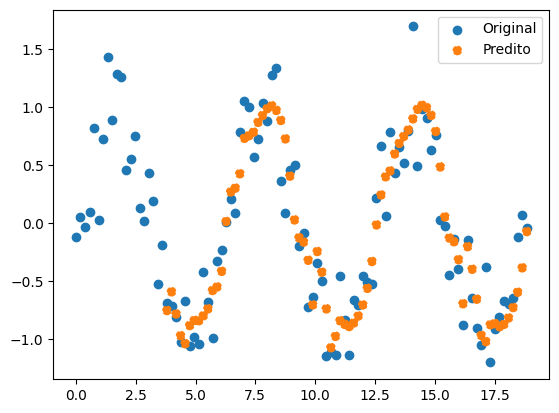

In [15]:
# Gerando predições para uma senoide
predicted_wave = []

input_seq = y[:sequence_length].reshape(1, sequence_length, 1)
input_seq = torch.tensor(input_seq, dtype=torch.float32)

for _ in range(num_points - sequence_length):
    predicted_next = rnn(input_seq)
    predicted_wave.append(predicted_next.item())

    # Arrasta a janela de entrada
    predicted_next = predicted_next.view(1, 1, 1)  # Reshape para (1, 1, 1)
    input_seq = torch.cat([input_seq[:, 1:, :], predicted_next], dim=1) # Remove o primeiro elemento e adiciona a predição

# Plota a senoide original e a predição
plt.scatter(x, y, label='Original')
plt.scatter(x[sequence_length:], predicted_wave, label='Predito', linestyle='dashed')
plt.legend()
plt.show()

## **Exercícios**

### **Exercício 1: Aumentando o Tamanho do Estado Oculto**

1. Aumente o tamanho do estado oculto (`hidden_size`) na rede RNN.
2. Treine a rede novamente com os mesmos dados de entrada.
3. Compare a perda final e as predições da rede com o modelo original.
4. Pergunta: Como o aumento do tamanho do estado oculto afetou o desempenho da rede?

Epoch 0, Loss: 0.8076594471931458
Epoch 50, Loss: 0.085849329829216
Epoch 100, Loss: 0.06748141348361969
Epoch 150, Loss: 0.05842358618974686
Epoch 200, Loss: 0.04292713850736618
Epoch 250, Loss: 0.030590523034334183
Epoch 300, Loss: 0.02403348498046398
Epoch 350, Loss: 0.01888720691204071
Epoch 400, Loss: 0.01570914313197136
Epoch 450, Loss: 0.017616860568523407

Tempo de treinamento ex1: 4.80 segundos


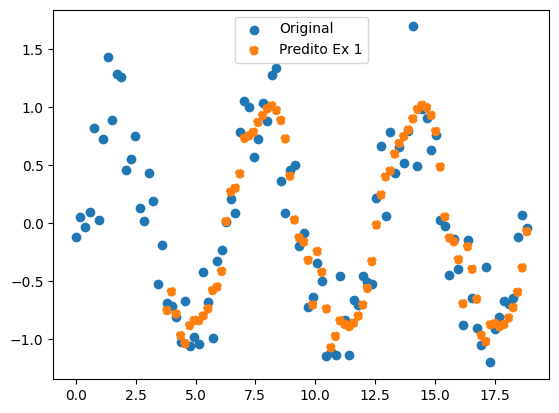

In [16]:
# 1
hidden_size_ex1 = 16

rnn_ex1 = RNN(input_size, hidden_size_ex1, output_size)

criterion_ex1 = nn.MSELoss()
optimizer_ex1 = optim.Adam(rnn_ex1.parameters(), lr=0.01)

# 2
# Treinamento
start_time = time.time()

for epoch in range(num_epochs):
    optimizer_ex1.zero_grad()

    predictions = rnn_ex1(inputs)
    loss = criterion_ex1(predictions, targets)
    loss.backward()
    optimizer_ex1.step()

    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

stop_time = time.time()
print(f"\nTempo de treinamento ex1: {stop_time - start_time:.2f} segundos")

# 3
# Gerando predições para uma senoide
predicted_wave_ex1 = []

input_seq_ex1 = y[:sequence_length].reshape(1, sequence_length, 1)
input_seq_ex1 = torch.tensor(input_seq_ex1, dtype=torch.float32)

for _ in range(num_points - sequence_length):
    predicted_next = rnn(input_seq_ex1)
    predicted_wave_ex1.append(predicted_next.item())

    # Arrasta a janela de entrada
    predicted_next = predicted_next.view(1, 1, 1)  # Reshape para (1, 1, 1)
    input_seq_ex1 = torch.cat([input_seq_ex1[:, 1:, :], predicted_next], dim=1) # Remove o primeiro elemento e adiciona a predição

# Plota a senoide original e a predição
plt.scatter(x, y, label='Original')
plt.scatter(x[sequence_length:], predicted_wave_ex1, label='Predito Ex 1', linestyle='dashed')
plt.legend()
plt.show()

In [17]:
# 4
"""
  O aumento do estado oculto provocou o deslocamento maior na janela de predições.
  Também percebe-se que a perda se reduz. A rede é simples, portanto o treinamento
  é rápido, mas também foi possível verificar um leve acréscimo no tempo de treinamento
  com mais estados ocultos.
"""

'\n  O aumento do estado oculto provocou o deslocamento maior na janela de predições. \n  Também percebe-se que a perda se reduz. A rede é simples, portanto o treinamento \n  é rápido, mas também foi possível verificar um leve acréscimo no tempo de treinamento \n  com mais estados ocultos.\n'

### **Exercício 2: Predição de Longo Prazo**

1. Use a RNN treinada para prever 100 pontos futuros da senoide a partir de uma nova sequência inicial de 20 pontos.
2. Aumente o número de camadas ocultas e tente novamente.
2. Compare as predições com a senoide original.
3. Pergunta: A rede consegue manter a forma da senoide por um longo período de predição? O que acontece com as predições ao longo do tempo?

In [18]:
# 1
input_seq_ex2 = y[:sequence_length].reshape(1, sequence_length, 1)
input_seq_ex2 = torch.tensor(input_seq_ex2, dtype=torch.float32)
predicts_1 = []

for _ in range(num_points - sequence_length):
    predicted_next = rnn(input_seq_ex2)
    predicts_1.append(predicted_next.item())

    # Arrasta a janela de entrada
    predicted_next = predicted_next.view(1, 1, 1)  # Reshape para (1, 1, 1)
    input_seq_ex2 = torch.cat([input_seq_ex2[:, 1:, :], predicted_next], dim=1) # Remove o primeiro elemento e adiciona a predição

In [19]:
# 2
class RNN_ex2(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(RNN_ex2, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        output, _ = self.rnn(x)
        return self.fc(output[:, -1, :])  # Saída do último estado oculto


num_layers = 3

rnn_ex2 = RNN_ex2(input_size=1, hidden_size=hidden_size, output_size=1, num_layers=num_layers)
criterion_ex2 = nn.MSELoss()
optimizer_ex2 = optim.Adam(rnn_ex2.parameters(), lr=0.01)

# Treinamento
start_time = time.time()

for epoch in range(num_epochs):
    optimizer_ex2.zero_grad()

    predictions = rnn_ex2(inputs)
    loss = criterion_ex2(predictions, targets)
    loss.backward()
    optimizer_ex2.step()

    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

stop_time = time.time()
print(f"\nTempo de treinamento ex2: {stop_time - start_time:.2f} segundos")

Epoch 0, Loss: 0.5359256863594055
Epoch 50, Loss: 0.10347868502140045
Epoch 100, Loss: 0.06737104803323746
Epoch 150, Loss: 0.055107273161411285
Epoch 200, Loss: 0.04697900265455246
Epoch 250, Loss: 0.0410032793879509
Epoch 300, Loss: 0.03639886528253555
Epoch 350, Loss: 0.02908141538500786
Epoch 400, Loss: 0.018767641857266426
Epoch 450, Loss: 0.017685774713754654

Tempo de treinamento ex2: 5.35 segundos


In [20]:
# Predição
input_seq_ex2 = y[:sequence_length].reshape(1, sequence_length, 1)
input_seq_ex2 = torch.tensor(input_seq_ex2, dtype=torch.float32)
predicts_2 = []

for _ in range(num_points - sequence_length):
    predicted_next = rnn(input_seq_ex2)
    predicts_2.append(predicted_next.item())

    # Arrasta a janela de entrada
    predicted_next = predicted_next.view(1, 1, 1)  # Reshape para (1, 1, 1)
    input_seq_ex2 = torch.cat([input_seq_ex2[:, 1:, :], predicted_next], dim=1) # Remove o primeiro elemento e adiciona a predição

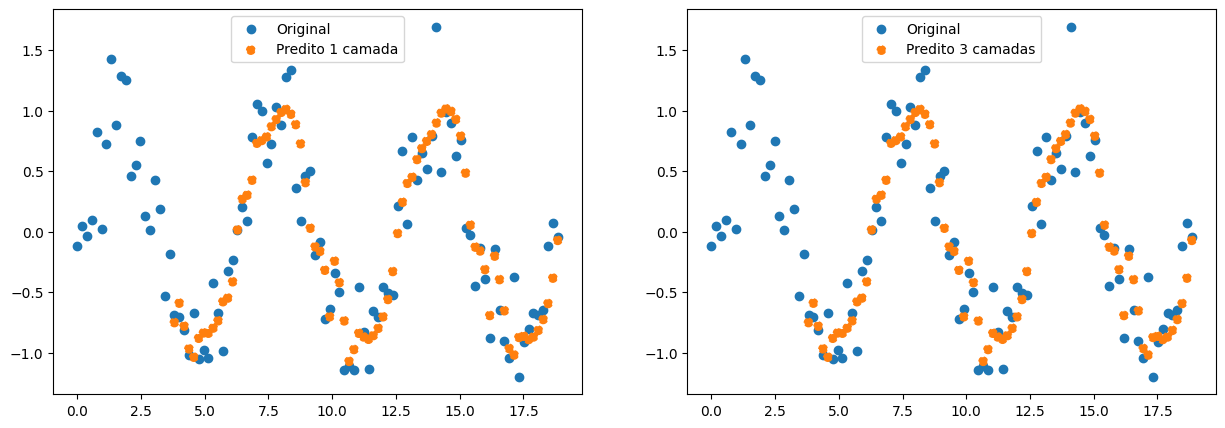

In [21]:
# 3
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(x, y, label='Original')
ax[0].scatter(x[sequence_length:], predicts_1, label='Predito 1 camada', linestyle='dashed')

ax[1].scatter(x, y, label='Original')
ax[1].scatter(x[sequence_length:], predicts_2, label='Predito 3 camadas', linestyle='dashed')

ax[0].legend()
ax[1].legend()

plt.show()

In [22]:
# 4
"""
  No curto prazo a RNN geralmente consegue predizer bem os pontos, replicando o padrão cíclico do treinamento.

  Porém, no longo prazo alguns problemas começam a ser observados, tais como o problema da deriva, fazendo com
  que as prediçòes comecem a se desviar gradualmente. Isso devido ao acúmulo de erros de precisão causado pela
  estrutura em cadeia, sendo cada ponto previsto a entrada da próxima predição. A senoide, especificamente,
  pode começar a achatar, oscilar de forma irregular ou ainda divergir completamente em arquiteturas simples
  como a RNN padrão.

  Para mitigar o problema, pode-se usar estruturas mais complexas, como a LSTM ou GRU, treinar com mais dados
  as diferentes fases da senóide ou ainda aumentar o número de camadas e neurönios ocultos, como observado no
  último treinamento, onde as perdas foram ainda menores.
"""

'\n  No curto prazo a RNN geralmente consegue predizer bem os pontos, replicando o padrão cíclico do treinamento.\n  \n  Porém, no longo prazo alguns problemas começam a ser observados, tais como o problema da deriva, fazendo com \n  que as prediçòes comecem a se desviar gradualmente. Isso devido ao acúmulo de erros de precisão causado pela\n  estrutura em cadeia, sendo cada ponto previsto a entrada da próxima predição. A senoide, especificamente,\n  pode começar a achatar, oscilar de forma irregular ou ainda divergir completamente em arquiteturas simples \n  como a RNN padrão.\n  \n  Para mitigar o problema, pode-se usar estruturas mais complexas, como a LSTM ou GRU, treinar com mais dados\n  as diferentes fases da senóide ou ainda aumentar o número de camadas e neurönios ocultos, como observado no\n  último treinamento, onde as perdas foram ainda menores.\n'

### **Exercício 3: Adicionando Ruído**

1. Adicione um ruído gaussiano mais forte à série temporal original (aumente a variância do ruído).
2. Treine a RNN com essa série temporal ruidosa.
3. Compare as predições com o modelo treinado com menos ruído.
4. Pergunta: Como o aumento do ruído nos dados de entrada impacta a capacidade da RNN de prever corretamente a série temporal?

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([80, 1])) that is different to the input size (torch.Size([3, 80, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, Loss: 0.2945312261581421
Epoch 50, Loss: 0.10589233785867691
Epoch 100, Loss: 0.07944723963737488
Epoch 150, Loss: 0.07130090892314911
Epoch 200, Loss: 0.06705380976200104
Epoch 250, Loss: 0.06107699126005173
Epoch 300, Loss: 0.05118275806307793
Epoch 350, Loss: 0.046668924391269684
Epoch 400, Loss: 0.04236619919538498
Epoch 450, Loss: 0.0425717830657959

Tempo de treinamento ex1: 2.49 segundos


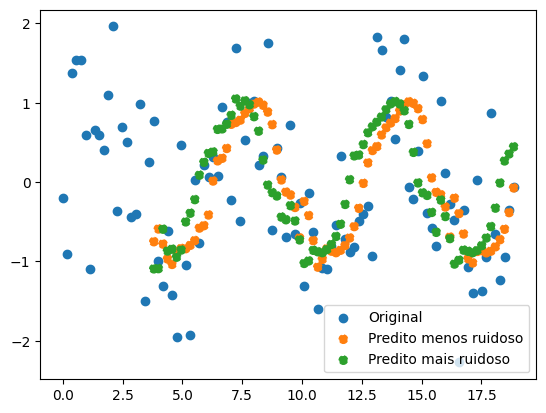

In [25]:
# 1
y_ex3 = np.sin(x) + np.random.normal(0, 0.7, num_points)

inputs_ex3 = []
targets_ex3 = []

for i in range(num_points - sequence_length):
    inputs_ex3.append(y[i:i+sequence_length])
    targets_ex3.append(y[i+sequence_length])

inputs_ex3 = torch.tensor(inputs_ex3, dtype=torch.float32).unsqueeze(-1)  # Shape: (batch_size, window_size, 1)
targets_ex3 = torch.tensor(targets_ex3, dtype=torch.float32).unsqueeze(-1)  # Shape: (batch_size, 1)

# 2
# Treinamento
rnn_ex3 = RNN(input_size=1, hidden_size=hidden_size, output_size=1, num_layers=num_layers)
criterion_ex3 = nn.MSELoss()
optimizer_ex3 = optim.Adam(rnn_ex3.parameters(), lr=0.01)

start_time = time.time()

for epoch in range(num_epochs):
    optimizer_ex3.zero_grad()

    predictions = rnn_ex3(inputs_ex3)
    loss = criterion_ex3(predictions, targets_ex3)
    loss.backward()
    optimizer_ex3.step()

    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

stop_time = time.time()
print(f"\nTempo de treinamento ex1: {stop_time - start_time:.2f} segundos")

# 3
# Gerando predições para uma senoide
predicted_wave_ex3 = []
input_seq_es3 = y_ex3[:sequence_length].reshape(1, sequence_length, 1)
input_seq_es3 = torch.tensor(input_seq_es3, dtype=torch.float32)

for _ in range(num_points - sequence_length):
    predicted_next = rnn(input_seq_es3)
    predicted_wave_ex3.append(predicted_next.item())

    # Arrasta a janela de entrada
    predicted_next = predicted_next.view(1, 1, 1)  # Reshape para (1, 1, 1)
    input_seq_es3 = torch.cat([input_seq_es3[:, 1:, :], predicted_next], dim=1) # Remove o primeiro elemento e adiciona a predição

# Plota a senoide original e a predição
plt.scatter(x, y_ex3, label='Original')
plt.scatter(x[sequence_length:], predicted_wave, label='Predito menos ruidoso', linestyle='dashed')
plt.scatter(x[sequence_length:], predicted_wave_ex3, label='Predito mais ruidoso', linestyle='dashed')
plt.legend()
plt.show()

In [24]:
# 4
"""
  O aumento do ruído aumenta a dificuldade em captar o padrão do modelo, resultando
  em predições que podem divergir do modelo original. A perda tende a ser maior, devido
  a propagação dos erros e, portanto, dificultando a rede a ajustar os pesos. O modelo
  tende a se desviar mais e aprender a reproduzir o ruído ao invés do original. Porém,
  ele pode generalizar melhor séries temporais com padrões menos claros, mas depende da
  relação entre a variância do ruído e o tamanho da série temporal.

  Para reduzir os problemas pode-se usar o dopout (penalidades) para eviter overfitting
  ao ruído, fornecer uma série maior, com mais dados ou diferentes padrões, ou ainda
  usar outras arquiteturas mais avançadas que têm maior capacidade de adaptação ao ruído.
"""

'\n  O aumento do ruído aumenta a dificuldade em captar o padrão do modelo, resultando\n  em predições que podem divergir do modelo original. A perda tende a ser maior, devido\n  a propagação dos erros e, portanto, dificultando a rede a ajustar os pesos. O modelo\n  tende a se desviar mais e aprender a reproduzir o ruído ao invés do original. Porém,\n  ele pode generalizar melhor séries temporais com padrões menos claros, mas depende da\n  relação entre a variância do ruído e o tamanho da série temporal.\n\n  Para reduzir os problemas pode-se usar o dopout (penalidades) para eviter overfitting\n  ao ruído, fornecer uma série maior, com mais dados ou diferentes padrões, ou ainda\n  usar outras arquiteturas mais avançadas que têm maior capacidade de adaptação ao ruído.\n'